In [4]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno
from pyproj import Proj, transform
import folium

In [6]:
df = pd.read_csv("/content/Licensing Board Licenses.csv")
df.head()

license_num historicallicensenum  status license_category  \
0   LB-494977                  NaN  Active             Misc   
1   LB-476649                  NaN  Active             Misc   
2   LB-494682                  NaN  Active               CV   
3   LB-493025                  NaN  Active               CV   
4   LB-512506                  NaN  Active               CV   

                       license_type      issued     expires  \
0        Lodging Houses (Frat/Dorm)  2022-12-02  2022-04-30   
1                  Retail Malt Wine  2022-11-30  2023-12-31   
2  CV7MWN - Neighborhood Restricted  2022-11-29  2022-12-31   
3                 Common Victualler  2022-11-29  2022-12-31   
4                 Common Victualler  2022-11-28  2022-12-31   

                              business_name              dba_name    comments  \
0  Fenway Community Development Corporation  Fenway Lodging House         NaN   
1                              Houjazy Inc.       Linden Suprette  No singles   
2                         VIA CANNUCCIA LLC         Via Cannuccia         NaN   
3                    Render Coffee 121, LLC         Render Coffee         NaN   
4            Shake Shack Massachusetts, LLC     Shake Shack #1431         NaN   

   ...                                  applicant            manager  \
0  ...   Fenway Community Development Corporation        David Lenar   
1  ...                               Houjazy Inc.       Fida Houjazy   
2  ...                          VIA CANNUCCIA LLC     Tsedenia Kiros   
3  ...                     Render Coffee 121, LLC  Christopher Dadey   
4  ...              Shake Shack Massachusetts LLC     Karina Gooding   

       day_phone evening_phone                address         city state  \
0            NaN           NaN      57-   Hemenway ST       Boston    MA   
1  (617)780-6450           NaN    101-   Brighton AVE       Boston    MA   
2  (857)370-2403           NaN  1739-  Dorchester AVE   Dorchester    MA   
3  (617)963-0148           NaN      32-  Cambridge ST  Charlestown    MA   
4  (347)573-1940           NaN    800     Boylston ST       Boston    MA   

     zip           gpsx          gpsy  
0  02115  767034.398230  2.951013e+06  
1  02134  756102.970866  2.953871e+06  
2  02124  774399.002493  2.931389e+06  
3  02129  771165.251994  2.965090e+06  
4  02199  769309.897281  2.951861e+06  

[5 rows x 25 columns]

I found business_name and applicant are the same, so I dropped 'business_name' column to avoid duplicate.

In [7]:
df = df.drop(columns=['location_comments', 'opening', 'closing', 'business_name', 'patronsout', 'comments', 'manager', 'day_phone', 'evening_phone'])
df.head()

license_num historicallicensenum  status license_category  \
0   LB-494977                  NaN  Active             Misc   
1   LB-476649                  NaN  Active             Misc   
2   LB-494682                  NaN  Active               CV   
3   LB-493025                  NaN  Active               CV   
4   LB-512506                  NaN  Active               CV   

                       license_type      issued     expires  \
0        Lodging Houses (Frat/Dorm)  2022-12-02  2022-04-30   
1                  Retail Malt Wine  2022-11-30  2023-12-31   
2  CV7MWN - Neighborhood Restricted  2022-11-29  2022-12-31   
3                 Common Victualler  2022-11-29  2022-12-31   
4                 Common Victualler  2022-11-28  2022-12-31   

               dba_name  capacity                                  applicant  \
0  Fenway Lodging House      14.0   Fenway Community Development Corporation   
1       Linden Suprette       0.0                               Houjazy Inc.   
2         Via Cannuccia       0.0                          VIA CANNUCCIA LLC   
3         Render Coffee       8.0                     Render Coffee 121, LLC   
4     Shake Shack #1431      49.0              Shake Shack Massachusetts LLC   

                 address         city state    zip           gpsx  \
0      57-   Hemenway ST       Boston    MA  02115  767034.398230   
1    101-   Brighton AVE       Boston    MA  02134  756102.970866   
2  1739-  Dorchester AVE   Dorchester    MA  02124  774399.002493   
3      32-  Cambridge ST  Charlestown    MA  02129  771165.251994   
4    800     Boylston ST       Boston    MA  02199  769309.897281   

           gpsy  
0  2.951013e+06  
1  2.953871e+06  
2  2.931389e+06  
3  2.965090e+06  
4  2.951861e+06

In [8]:
df[df.status != 'Active']

Empty DataFrame
Columns: [license_num, historicallicensenum, status, license_category, license_type, issued, expires, dba_name, capacity, applicant, address, city, state, zip, gpsx, gpsy]
Index: []

In [9]:
df = df.drop(['status', 'issued', 'expires'], axis=1)
df.head()

license_num historicallicensenum license_category  \
0   LB-494977                  NaN             Misc   
1   LB-476649                  NaN             Misc   
2   LB-494682                  NaN               CV   
3   LB-493025                  NaN               CV   
4   LB-512506                  NaN               CV   

                       license_type              dba_name  capacity  \
0        Lodging Houses (Frat/Dorm)  Fenway Lodging House      14.0   
1                  Retail Malt Wine       Linden Suprette       0.0   
2  CV7MWN - Neighborhood Restricted         Via Cannuccia       0.0   
3                 Common Victualler         Render Coffee       8.0   
4                 Common Victualler     Shake Shack #1431      49.0   

                                   applicant                address  \
0   Fenway Community Development Corporation      57-   Hemenway ST   
1                               Houjazy Inc.    101-   Brighton AVE   
2                          VIA CANNUCCIA LLC  1739-  Dorchester AVE   
3                     Render Coffee 121, LLC      32-  Cambridge ST   
4              Shake Shack Massachusetts LLC    800     Boylston ST   

          city state    zip           gpsx          gpsy  
0       Boston    MA  02115  767034.398230  2.951013e+06  
1       Boston    MA  02134  756102.970866  2.953871e+06  
2   Dorchester    MA  02124  774399.002493  2.931389e+06  
3  Charlestown    MA  02129  771165.251994  2.965090e+06  
4       Boston    MA  02199  769309.897281  2.951861e+06

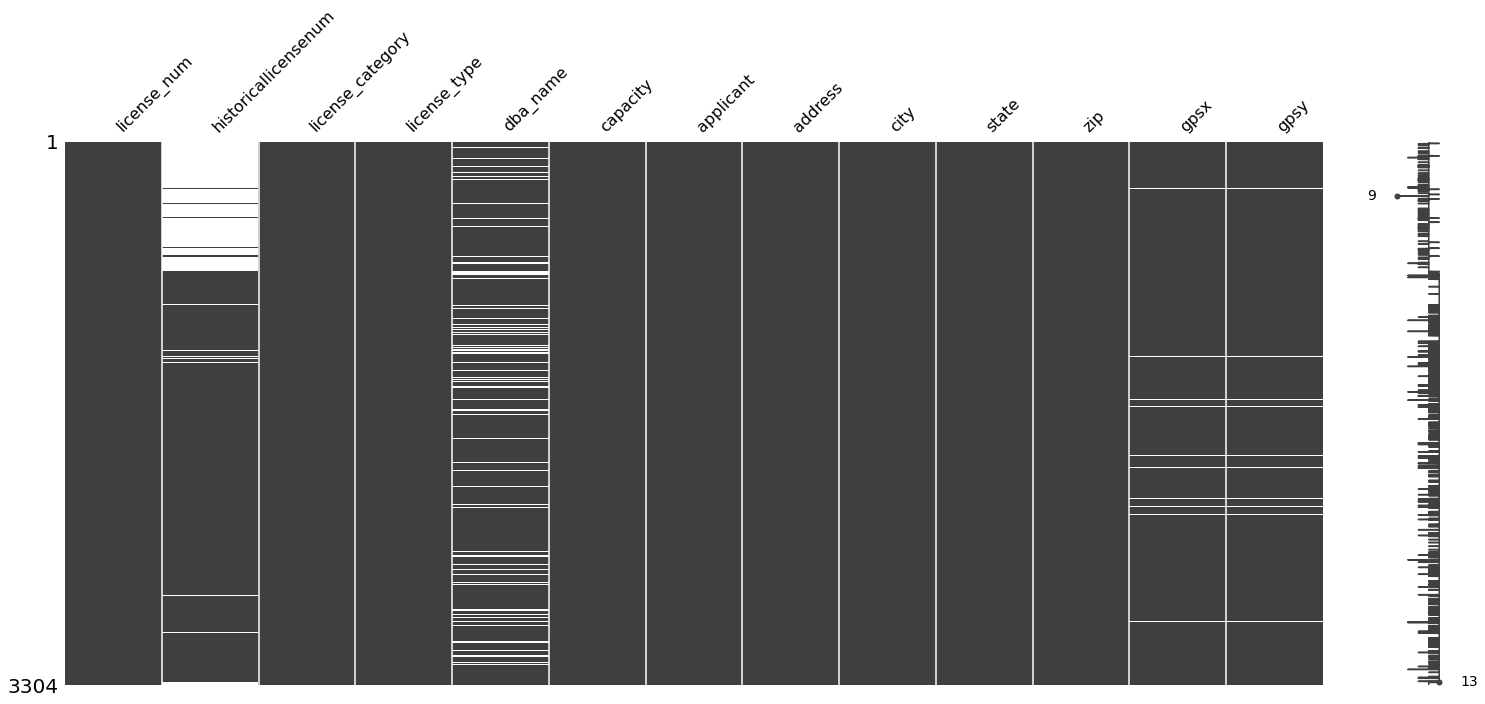

In [10]:
missingno.matrix(df)

In [11]:
df = df.drop(['historicallicensenum'], axis=1)
df.head()

license_num license_category                      license_type  \
0   LB-494977             Misc        Lodging Houses (Frat/Dorm)   
1   LB-476649             Misc                  Retail Malt Wine   
2   LB-494682               CV  CV7MWN - Neighborhood Restricted   
3   LB-493025               CV                 Common Victualler   
4   LB-512506               CV                 Common Victualler   

               dba_name  capacity                                  applicant  \
0  Fenway Lodging House      14.0   Fenway Community Development Corporation   
1       Linden Suprette       0.0                               Houjazy Inc.   
2         Via Cannuccia       0.0                          VIA CANNUCCIA LLC   
3         Render Coffee       8.0                     Render Coffee 121, LLC   
4     Shake Shack #1431      49.0              Shake Shack Massachusetts LLC   

                 address         city state    zip           gpsx  \
0      57-   Hemenway ST       Boston    MA  02115  767034.398230   
1    101-   Brighton AVE       Boston    MA  02134  756102.970866   
2  1739-  Dorchester AVE   Dorchester    MA  02124  774399.002493   
3      32-  Cambridge ST  Charlestown    MA  02129  771165.251994   
4    800     Boylston ST       Boston    MA  02199  769309.897281   

           gpsy  
0  2.951013e+06  
1  2.953871e+06  
2  2.931389e+06  
3  2.965090e+06  
4  2.951861e+06

In [12]:
df.groupby(['license_category']).size()

license_category
CV                    2380
Club                    55
General on Premise       4
Inn                     94
Misc                   771
dtype: int64

In [13]:
def getLoc(df):
    inProj = Proj('epsg:2249')
    outProj = Proj('epsg:4326')
    x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
    return x, y

df[['latitude', 'longitude']] = df.apply(getLoc, axis=1, result_type="expand")

Streaming output truncated to the last 5000 lines.
<ipython-input-13-abb85b8cb0ad>:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
<ipython-input-13-abb85b8cb0ad>:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
<ipython-input-13-abb85b8cb0ad>:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
<ipython-input-13-abb85b8cb0ad>:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y = transform(inProj,outProj,df['gpsx'],df['gpsy'])
<ipython-

In [14]:
df

license_num license_category                      license_type  \
0      LB-494977             Misc        Lodging Houses (Frat/Dorm)   
1      LB-476649             Misc                  Retail Malt Wine   
2      LB-494682               CV  CV7MWN - Neighborhood Restricted   
3      LB-493025               CV                 Common Victualler   
4      LB-512506               CV                 Common Victualler   
...          ...              ...                               ...   
3299   LB-107554             Misc                         Dormitory   
3300   LB-107515             Misc                         Dormitory   
3301   LB-108942               CV                 Common Victualler   
3302   LB-109265               CV                 Common Victualler   
3303   LB-107749               CV                 Common Victualler   

                           dba_name  capacity  \
0              Fenway Lodging House      14.0   
1                   Linden Suprette       0.0   
2                     Via Cannuccia       0.0   
3                     Render Coffee       8.0   
4                 Shake Shack #1431      49.0   
...                             ...       ...   
3299              BOSTON UNIVERSITY      17.0   
3300              BOSTON UNIVERSITY       0.0   
3301             Whole Foods Market      40.0   
3302  Boston Croissant Bakery, Cafe       4.0   
3303                         Xi Cha       0.0   

                                      applicant                   address  \
0      Fenway Community Development Corporation         57-   Hemenway ST   
1                                  Houjazy Inc.       101-   Brighton AVE   
2                             VIA CANNUCCIA LLC     1739-  Dorchester AVE   
3                        Render Coffee 121, LLC         32-  Cambridge ST   
4                 Shake Shack Massachusetts LLC       800     Boylston ST   
...                                         ...                       ...   
3299              Trustees of Boston University          828-   Beacon ST   
3300              Trustees of Boston University           824-  Beacon ST   
3301              Whole Foodsmarket Group, Inc.            27-  Austin St   
3302               Sultana's Bakery & Cafe, LLC  1585-   Commonwealth AVE   
3303                         Xi Cha Corporation        350-  Longwood AVE   

             city state    zip           gpsx          gpsy   latitude  \
0          Boston    MA  02115  767034.398230  2.951013e+06  42.345000   
1          Boston    MA  02134  756102.970866  2.953871e+06  42.352980   
2      Dorchester    MA  02124  774399.002493  2.931389e+06  42.291050   
3     Charlestown    MA  02129  771165.251994  2.965090e+06  42.383570   
4          Boston    MA  02199  769309.897281  2.951861e+06  42.347297   
...           ...   ...    ...            ...           ...        ...   
3299       Boston    MA  02215  763534.678643  2.951919e+06  42.347530   
3300       Boston    MA  02215  763576.531387  2.951933e+06  42.347569   
3301  Charlestown    MA  02129  773358.251506  2.962150e+06  42.375474   
3302     Brighton    MA  02135  752659.000009  2.950680e+06  42.344263   
3303       Boston    MA  02115  762561.013303  2.948507e+06  42.338180   

      longitude  
0    -71.089890  
1    -71.130280  
2    -71.063020  
3    -71.074350  
4    -71.081457  
...         ...  
3299 -71.102820  
3300 -71.102665  
3301 -71.066288  
3302 -71.143070  
3303 -71.106480  

[3304 rows x 14 columns]

In [15]:
df = df.drop(columns=['capacity', 'gpsx', 'gpsy'], axis=1)

In [16]:
def getClass(df):
    if df['license_category'] == 'Misc':
        return 1
    if df['license_category'] == 'CV':
        return 2
    if df['license_category'] == 'Club':
        return 3
    if df['license_category'] == 'Inn':
        return 4
    else:
        return 5

df.loc[:,'class'] = df.apply(getClass, axis=1)

In [17]:
df

license_num license_category                      license_type  \
0      LB-494977             Misc        Lodging Houses (Frat/Dorm)   
1      LB-476649             Misc                  Retail Malt Wine   
2      LB-494682               CV  CV7MWN - Neighborhood Restricted   
3      LB-493025               CV                 Common Victualler   
4      LB-512506               CV                 Common Victualler   
...          ...              ...                               ...   
3299   LB-107554             Misc                         Dormitory   
3300   LB-107515             Misc                         Dormitory   
3301   LB-108942               CV                 Common Victualler   
3302   LB-109265               CV                 Common Victualler   
3303   LB-107749               CV                 Common Victualler   

                           dba_name  \
0              Fenway Lodging House   
1                   Linden Suprette   
2                     Via Cannuccia   
3                     Render Coffee   
4                 Shake Shack #1431   
...                             ...   
3299              BOSTON UNIVERSITY   
3300              BOSTON UNIVERSITY   
3301             Whole Foods Market   
3302  Boston Croissant Bakery, Cafe   
3303                         Xi Cha   

                                      applicant                   address  \
0      Fenway Community Development Corporation         57-   Hemenway ST   
1                                  Houjazy Inc.       101-   Brighton AVE   
2                             VIA CANNUCCIA LLC     1739-  Dorchester AVE   
3                        Render Coffee 121, LLC         32-  Cambridge ST   
4                 Shake Shack Massachusetts LLC       800     Boylston ST   
...                                         ...                       ...   
3299              Trustees of Boston University          828-   Beacon ST   
3300              Trustees of Boston University           824-  Beacon ST   
3301              Whole Foodsmarket Group, Inc.            27-  Austin St   
3302               Sultana's Bakery & Cafe, LLC  1585-   Commonwealth AVE   
3303                         Xi Cha Corporation        350-  Longwood AVE   

             city state    zip   latitude  longitude  class  
0          Boston    MA  02115  42.345000 -71.089890      1  
1          Boston    MA  02134  42.352980 -71.130280      1  
2      Dorchester    MA  02124  42.291050 -71.063020      2  
3     Charlestown    MA  02129  42.383570 -71.074350      2  
4          Boston    MA  02199  42.347297 -71.081457      2  
...           ...   ...    ...        ...        ...    ...  
3299       Boston    MA  02215  42.347530 -71.102820      1  
3300       Boston    MA  02215  42.347569 -71.102665      1  
3301  Charlestown    MA  02129  42.375474 -71.066288      2  
3302     Brighton    MA  02135  42.344263 -71.143070      2  
3303       Boston    MA  02115  42.338180 -71.106480      2  

[3304 rows x 12 columns]

In [18]:
df1 = df[df['class'] == 1]
df1 = df1.dropna(subset=['latitude', 'longitude'])
df1.head()


license_num license_category                license_type  \
0    LB-494977             Misc  Lodging Houses (Frat/Dorm)   
1    LB-476649             Misc            Retail Malt Wine   
5    LB-485386             Misc            Retail Malt Wine   
11   LB-489600             Misc            Retail Malt Wine   
23   LB-445763             Misc            Retail Malt Wine   

                            dba_name  \
0               Fenway Lodging House   
1                    Linden Suprette   
5                  Dorchester Market   
11                          E Market   
23  Grove Hall Convenience Market II   

                                    applicant              address  \
0    Fenway Community Development Corporation    57-   Hemenway ST   
1                                Houjazy Inc.  101-   Brighton AVE   
5                       Dorchester Market LLC  951-  Dorchester AV   
11                       Peabody EMarket Inc.          4-  Park Pz   
23                     Grove Hall Foods Corp.    292-   Talbot AVE   

          city state    zip   latitude  longitude  class  
0       Boston    MA  02115  42.345000 -71.089890      1  
1       Boston    MA  02134  42.352980 -71.130280      1  
5   Dorchester    MA  02125  42.318251 -71.057002      1  
11      Boston    MA  02116  42.352273 -71.067098      1  
23      Boston    MA  02124  42.291040 -71.074360      1

In [19]:
df2 = df[df['class'] == 2]
df2 = df2.dropna(subset=['latitude', 'longitude'])
df2.head()


license_num license_category                      license_type  \
2   LB-494682               CV  CV7MWN - Neighborhood Restricted   
3   LB-493025               CV                 Common Victualler   
4   LB-512506               CV                 Common Victualler   
6   LB-370775               CV                 Common Victualler   
7   LB-475186               CV                 Common Victualler   

                         dba_name                              applicant  \
2                   Via Cannuccia                      VIA CANNUCCIA LLC   
3                   Render Coffee                 Render Coffee 121, LLC   
4               Shake Shack #1431          Shake Shack Massachusetts LLC   
6  Irie Jamaican Style Restaurant   Irie Jamaica Style Restaurant, Corp.   
7               Public Coffee Co.             Public Coffee Company, LLC   

                   address           city state    zip   latitude  longitude  \
2    1739-  Dorchester AVE     Dorchester    MA  02124  42.291050 -71.063020   
3        32-  Cambridge ST    Charlestown    MA  02129  42.383570 -71.074350   
4      800     Boylston ST         Boston    MA  02199  42.347297 -71.081457   
6   1450-   Dorchester AVE         Boston    MA  02122  42.301160 -71.059750   
7  180-190   Hyde Park AVE  Jamaica Plain    MA  02130  42.294741 -71.116732   

   class  
2      2  
3      2  
4      2  
6      2  
7      2

In [20]:
df3 = df[df['class'] == 3]
df3 = df3.dropna(subset=['latitude', 'longitude'])
df3.head()


license_num license_category           license_type  \
36    LB-482851             Club  Clb. All Alc. Airport   
53    LB-468134             Club  Clb. All Alc. Airport   
116   LB-420671             Club  Clb. All Alc. Airport   
545   LB-167019             Club     Clb. All Alc. Vet.   
574   LB-146400             Club  Clb. All Alc. Airport   

                   dba_name  \
36   Delta Sky Club Express   
53            Airist Boston   
116          Delta Sky Club   
545            PERKINS POST   
574                     NaN   

                                             applicant  \
36                               Delta Air Lines, Inc.   
53                                Airist Boston Co Inc   
116                              Delta Air Lines, Inc.   
545   MICHAEL J. PERKINS AMERICAN LEGION POST 67, INC.   
574                               Airist Boston Co Inc   

                                address          city state    zip   latitude  \
36          Logan Airport, Terminal E     East Boston    MA  02128  34.244387   
53   500     Logan Airport Terminal E     East Boston    MA  02128  34.244387   
116          Logan Airport Terminal A     East Boston    MA  02128  34.244387   
545                    859- E Fourth St  South Boston    MA  02127  42.334685   
574  500     Logan Airport Terminal E     East Boston    MA  02128  34.244387   

     longitude  class  
36  -73.651391      3  
53  -73.651391      3  
116 -73.651391      3  
545 -71.029056      3  
574 -73.651391      3

In [21]:
df4 = df[df['class'] == 4]
df4 = df4.dropna(subset=['latitude', 'longitude'])
df4.head()

license_num license_category             license_type  \
39    LB-463019              Inn      Innholder No Liquor   
65    LB-468377              Inn      Innholder No Liquor   
175   LB-443334              Inn      Innholder No Liquor   
310   LB-381128              Inn  Inn. All Alc. Restrict.   
401   LB-303392              Inn            Inn. All Alc.   

                                    dba_name                     applicant  \
39                                       NaN   Sonder Hospitality USA, Inc   
65                      Studio Allston Hotel           TDC 1234 Owner, LLC   
175  Home2 Suites by Hilton Boston South Bay         SB Partners Three LLC   
310                     The Revolution Hotel                  MVC 40B, LLC   
401                      Hotel Indigo Boston     280 FRIEND STREET FEE LLC   

                        address        city state    zip   latitude  \
39             234-  Newbury ST      Boston    MA  02116  42.349614   
65   1234     Soldiers Field RD    Brighton    MA  02134  42.363700   
175          15-  Jan Karski WY  Dorchester    MA  02125  42.325829   
310           40-   Berkeley ST      Boston    MA  02116  42.345940   
401           280     Friend ST      Boston    MA  02114  42.364860   

     longitude  class  
39  -71.081609      4  
65  -71.136380      4  
175 -71.060555      4  
310 -71.070900      4  
401 -71.061850      4

In [22]:
df5 = df[df['class'] == 5]
df5 = df5.dropna(subset=['latitude', 'longitude'])
df5.head()


license_num    license_category        license_type             dba_name  \
2090    LB-99603  General on Premise  GOP Malt Wine Liq.                  NaN   
3284   LB-101596  General on Premise  GOP Malt Wine Liq.  THE ORPHEUM THEATRE   
3285   LB-101610  General on Premise  GOP Malt Wine Liq.      EMERSON COLLEGE   
3286   LB-101611  General on Premise  GOP Malt Wine Liq.                  NaN   

                            applicant             address         city state  \
2090   Immersive Art Space Boston LLC  130-  Columbus AVE       Boston    MA   
3284      BOSTON CULINARY GROUP, INC.     1-  Hamilton Pl       Boston    MA   
3285                  EMERSON COLLEGE   219-   Tremont ST       Boston    MA   
3286         EMANUEL ENTERPRISES, LLC  71-73  Meridian ST  East Boston    MA   

        zip   latitude  longitude  class  
2090  02116  42.349508 -71.070243      5  
3284  02108  42.356205 -71.060941      5  
3285  02116  42.351570 -71.065020      5  
3286  02128  42.371967 -71.038818      5

In [23]:
basemap = folium.Map(location=[42.345000,-71.089890],tiles="Stamen Terrain",
 width="%100",
height="%100", zoom_start = 12)
basemap

In [24]:
Misc=folium.FeatureGroup(name='Misc', show=False)
CV=folium.FeatureGroup(name='CV', show=False)
Club=folium.FeatureGroup(name='Club', show=False)
Inn=folium.FeatureGroup(name='Inn', show=False)
General_on_Premise=folium.FeatureGroup(name='General on Premise', show=False)


In [25]:
for i in range(0,len(df1)):
   Misc.add_child(folium.Circle(
      location=[df1.iloc[i]['latitude'], df1.iloc[i]['longitude']],
      popup=df1.iloc[i]['applicant'],
      fill=False
   ))

In [26]:
for i in range(0,len(df2)):
   CV.add_child(folium.Circle(
      location=[df2.iloc[i]['latitude'], df2.iloc[i]['longitude']],
      popup=df2.iloc[i]['applicant'],
      color='crimson',
      fill=False
   ))


In [27]:
for i in range(0,len(df3)):
   Club.add_child(folium.Circle(
      location=[df3.iloc[i]['latitude'], df3.iloc[i]['longitude']],
      popup=df3.iloc[i]['applicant'],
      color='orange',
      fill=False
   ))

In [28]:
for i in range(0,len(df4)):
   Inn.add_child(folium.Circle(
      location=[df4.iloc[i]['latitude'], df4.iloc[i]['longitude']],
      popup=df4.iloc[i]['applicant'],
      color='black',
      fill=False
   ))

In [29]:
for i in range(0,len(df5)):
   General_on_Premise.add_child(folium.Circle(
      location=[df5.iloc[i]['latitude'], df5.iloc[i]['longitude']],
      popup=df5.iloc[i]['applicant'],
      color='lightgreen',
      fill=False
   ))

In [30]:
basemap.add_child(Misc)
basemap.add_child(CV)
basemap.add_child(Club)
basemap.add_child(Inn)
basemap.add_child(General_on_Premise)
basemap.add_child(folium.LayerControl())